In [1]:
import os
import argparse
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import utilities.text_helper as text_helper
from models.resnest_model import VqaModel
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cpu')

In [7]:
model = VqaModel(
        embed_size=1024,
        qst_vocab_size=17856,
        ans_vocab_size=1000,
        word_embed_size=300,
        num_layers=2,
        hidden_size=512).to(device)

checkpoint = torch.load("models/resnest.ckpt", map_location=torch.device(device))
state_dict = checkpoint['state_dict']
model.load_state_dict(state_dict)
model.eval()

TypeError: __init__() got an unexpected keyword argument 'embed_size'

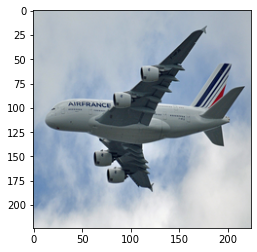

In [113]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
img = Image.open("inference_images/img3.jpg").convert('RGB')
img = img.resize((224,224), Image.ANTIALIAS)
plt.imshow(img)
img = transform(img)
input_img = torch.unsqueeze(img, dim=0)

In [149]:
# get image and question
qst_str = "What is the airplane doing?"
qst_tokens = text_helper.tokenize(qst_str)

In [150]:
max_qst_length = 30  # or 26

qst_vocab = text_helper.VocabDict('datasets/vocab_questions.txt')

qst2idc = np.array([qst_vocab.word2idx('<pad>')] * max_qst_length)  # padded with '<pad>' in 'ans_vocab'
qst2idc[:len(qst_tokens)] = [qst_vocab.word2idx(w) for w in qst_tokens]

input_qst = torch.from_numpy(qst2idc).long()
input_qst = torch.unsqueeze(input_qst, dim=0)

In [151]:
output = model(input_img, input_qst)

In [152]:
_, ans = torch.max(output, 1)  # [batch_size]

def load_str_list(fname):
    with open(fname) as f:
        lines = f.readlines()
    lines = [l.strip() for l in lines]
    return lines

word_list = load_str_list('datasets/vocab_answers.txt')

In [153]:
word_list[ans.item()]

'<unk>'